# Task 1: Binary nearest centroid classifier
Given the following dataset, please do the following:

#### 1. Implement the Nearest centroid classifier as a function or class, using the euclidean distance as a distance function:

$dist(\mathbf x, \mathbf y)=\lvert\lvert \mathbf x - \mathbf y \lvert\lvert^{2}$

#### 2. Plot the decision boundary for given dataset(Note: decision boundary is where the distance to both centroids is equally large)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# create synthetic dataset
dog_data = pd.DataFrame(data={'good girl/boy': [2, 2.4, 2.5, 3], 'grumpiness': [.9, .9, 1.2 ,.8]})
cat_data = pd.DataFrame(data={'good girl/boy': [0.10, 0.5, 0.7, 0.2], 'grumpiness': [2, 1.5 ,1.8, 1.7]})

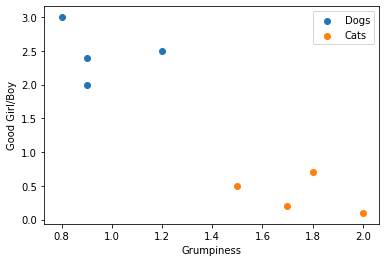

In [19]:
plt.scatter(dog_data['grumpiness'], dog_data['good girl/boy'], label='Dogs')
plt.scatter(cat_data['grumpiness'], cat_data['good girl/boy'], label='Cats')
plt.xlabel('Grumpiness')
plt.ylabel('Good Girl/Boy')
plt.legend()
plt.show()

# Task 2: Binary breast cancer classification
Following up you'll find a UCI dataset containing samples of healthy patients, and patients that were diagnosed with breast cancer. 
For specific information about the dataset, please visit: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Your goals are to complete the following tasks:

### 1. Parse the data and perform some exploration first, that is:
    - Plot histogram of radius mean values
        - Hint: Use np.hist() 
    - Plot correlation matrix between between every pair of features
        - Hint: Use sns.heatmap()
    - Choose 5 features that don't correlate with each other and drop the rest

### 2. Split the data into training and test set(the ratio should be 80% / 20%)
    - Before splitting, convert all categorical features into numerical ones
        - Hint: Use pd.get_dummies()
    
### 3. Use the sklearn package and train the following algorithms on the dataset:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    - Apply the following linear models to the dataset:
        - Logisitc regression
        - SVM(linear kernel)
    - Apply the following non-linear models to the dataset:
        - SVM(rbf kernel)
        - Random Forest
        
    - NOTE: Test different hyperparameter settings for the corresponding models and pick the best one.
    
### 4. Compute the confusion matrix for each classifier, which one performs best and why would you say so ?
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
data = pd.read_csv('data/breast_cancer_data.csv')

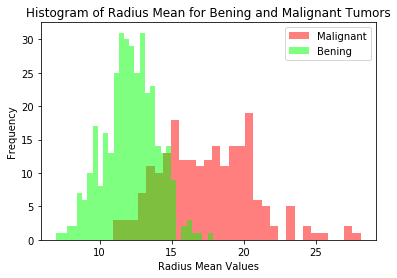

Most frequent malignant radius mean is:  20.101999999999997


In [21]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

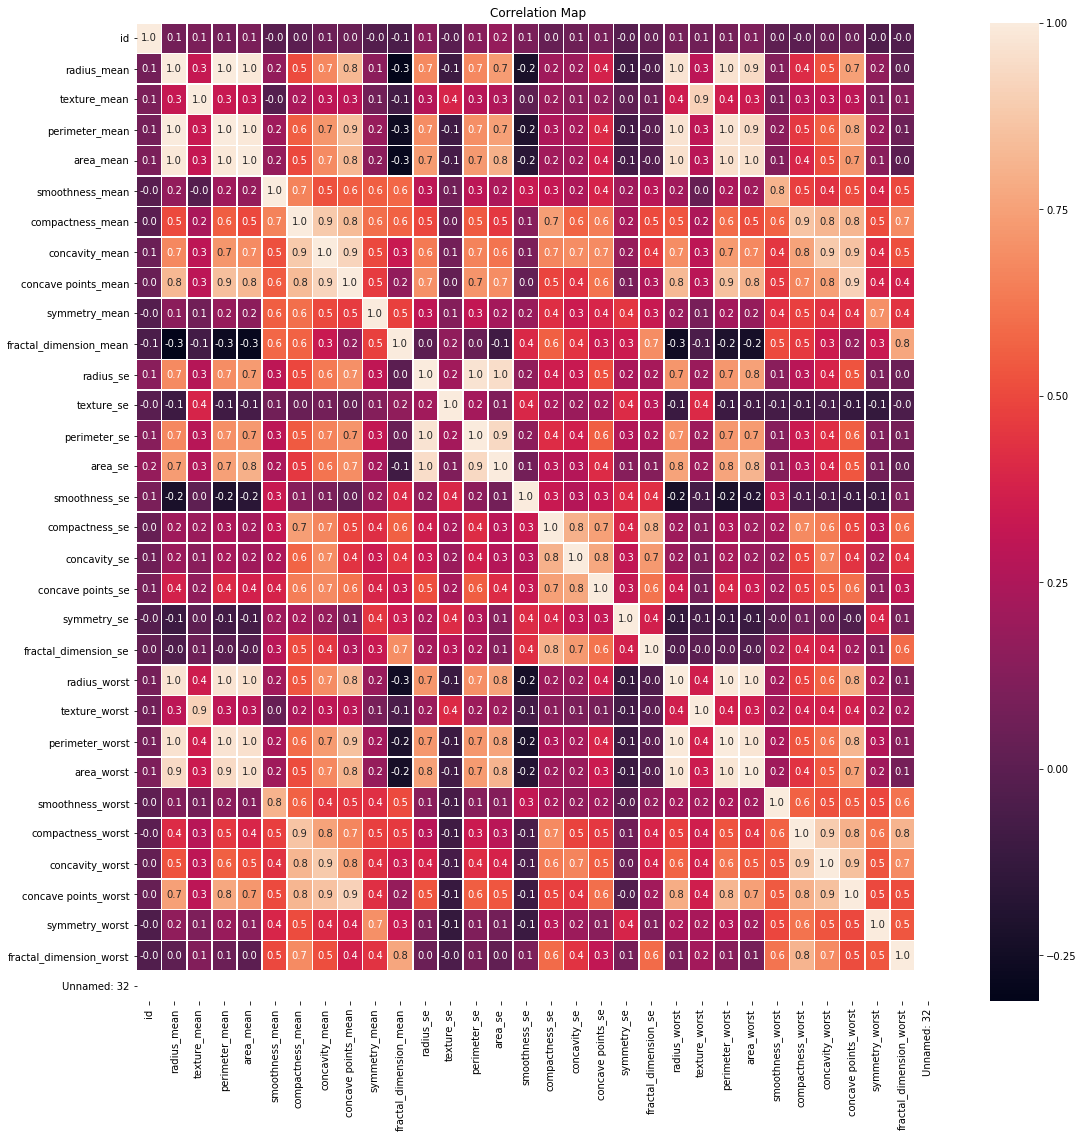

In [22]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

# Task 3: Multiclass sentiment Analysis
Goal: Identify and categorize opinions from text data.
---
Following up you'll find a official dataset containing user tweets about the first 2016 GOP Presidential Debate, or as stated by the original source: 
```
We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset.
```
For more information about the data, please follow:
https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment


### Your goals are to complete the following tasks:
---

### 1. Parse the data and perform some exploration first, that is:
- Load and initially explore the dataset located under: 'data/sentiment.csv'
- remove all columns except 'text' and 'sentiment'
- split data into 2 separate datasets, where one contains just negative and one contains the positive tweets(create 2 new datasets instead of deleting the old one)
- remove stop words from tweets(see https://www.nltk.org/book/ch02.html 4.1), as well as hashtags, '@'-signs and 'RT'-sig
- print a wordcloud for the positive-tweet dataset aswell as the negative tweets dataset. It displays the most appearing words in each dataset. The code for the wordcloud is provided below.
- create a list object, called 'tweets', that contains tuples: (list of words in tweet(cleaned), sentiment('Negative' or 'Positive'))

### 2. Split the data into training and test set(the ratio should be 80% / 20%)
    
    
### 3. Use the nltk library to train a NaiveBayesClassifier on the dataset:
- use nltk.classify.util.apply_features to provide the word features to the classifier(look up docu https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.util)
the needed input argument feature_func input is provided by extract_features function.
- Use: 'classifier = nltk.NaiveBayesClassifier.train(training_set)' to train the classifier, where training_set is the output of the apply_features function

### 4. Use the trained classifier to predict the sentiments of the test set. Plot confusion matrix

### 5. Provide your own inputs to the classifier and see check whether it is able to classify your intended sentiment.

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [24]:
data = pd.read_csv('data/sentiment.csv')
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [25]:
data = data[['text','sentiment']]

In [26]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [27]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


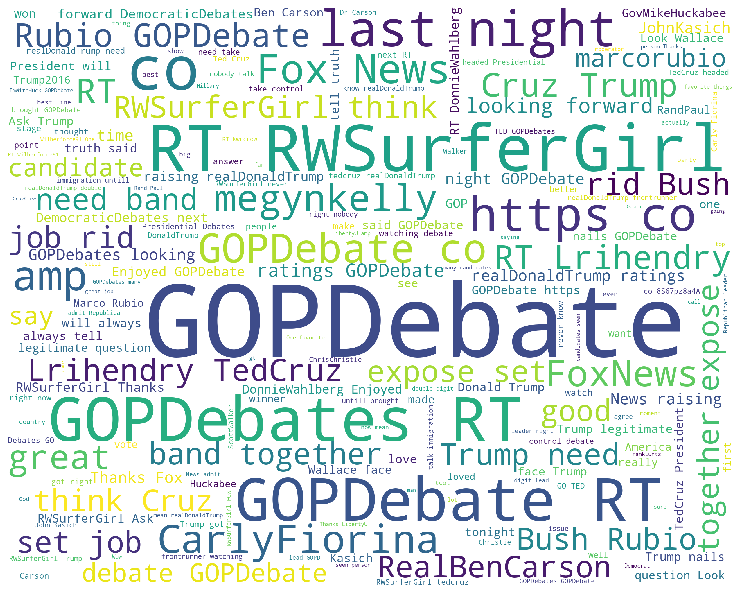

Negative words


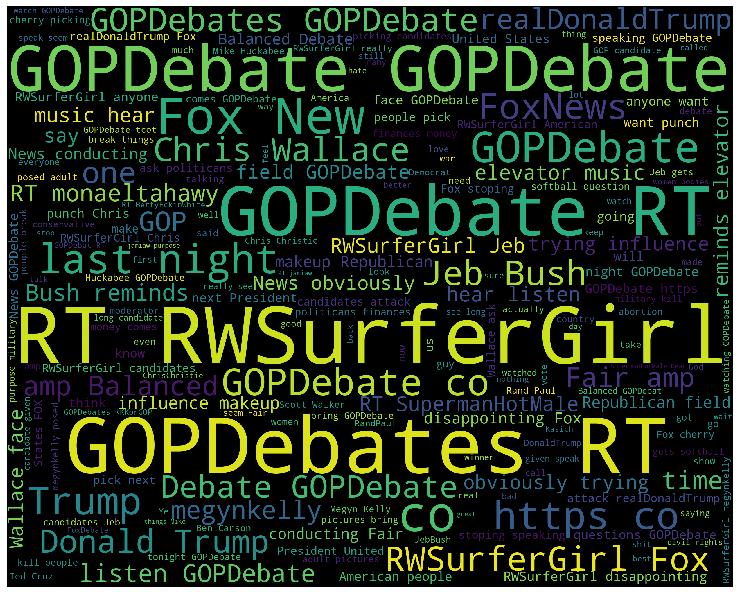

In [28]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud(cleaned_words, color='black'):
    words = ' '.join(cleaned_words)
    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud(train_pos,'white')
print("Negative words")
wordcloud(train_neg)

In [29]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [56]:
# Provided functions
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [34]:
neg_cnt = 0
pos_cnt = 0

for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
        
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neg_cnt, len(test_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt, len(test_pos)))   

[Negative]: 803/856 
[Positive]: 92/221 
